<a href="https://colab.research.google.com/github/Tushar-Keshari/Deep-Learning/blob/main/Data_augmentation_for_flower_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
import PIL
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [ ]:
roses = list(data_dir.glob('roses/*.jpg'))
len(roses)

641

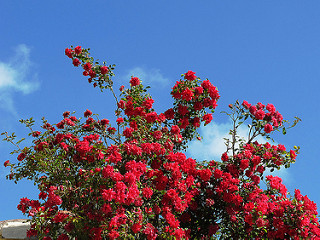

In [ ]:
PIL.Image.open(str(roses[0]))

In [ ]:
flower_image_dir = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

flower_labels_dir = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [ ]:
img = cv2.imread(str(roses[0]))
img.shape

(240, 320, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
x , y = [], []

for flower_name, images in flower_image_dir.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flower_labels_dir[flower_name])

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
model = Sequential([
    layers.Conv2D(8,(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(16,(3,3),padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3), padding='same',activation='relu'),
    layers.MaxPooling2D((3,3)),
    layers.Conv2D(64,(3,3), padding='same',activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),padding='same', activation='relu'),
    layers.MaxPooling2D((4,4)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30)


Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.2828 - loss: 1.5345
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5114 - loss: 1.1517
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5899 - loss: 1.0098
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6186 - loss: 0.9236
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6587 - loss: 0.8437
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6755 - loss: 0.8204
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6749 - loss: 0.8188
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7246 - loss: 0.6818
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7628 - loss: 0.6199
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7590 - loss: 0.6257
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7810 - loss: 0.5788
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy:

In [ ]:
model.evaluate(x_test, y_test) # the accuracy is so less because of over fitting

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6644 - loss: 1.6809


[1.5897585153579712, 0.6895424723625183]

In [ ]:
data_augmentation = keras.Sequential(
    [
        # layers.Random(flip='horizontal'),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.5),
    ])

In [ ]:
model = Sequential([
    data_augmentation,
    layers.Conv2D(8,(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(16,(3,3),padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3), padding='same',activation='relu'),
    layers.MaxPooling2D((3,3)),
    layers.Conv2D(64,(3,3), padding='same',activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),padding='same', activation='relu'),
    layers.MaxPooling2D((4,4)),

    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50)

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.2541 - loss: 1.5629
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5065 - loss: 1.1494
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5699 - loss: 1.0478
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5885 - loss: 0.9855
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6094 - loss: 0.9382
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6334 - loss: 0.9017
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6386 - loss: 0.8761
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6500 - loss: 0.8522
Epoch 9/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6503 - loss: 0.8563
Epoch 10/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6565 - loss: 0.8115
Epoch 11/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6790 - loss: 0.7983
Epoch 12/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy:

In [ ]:
model.evaluate(x_test, y_test)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7136 - loss: 0.7092


[0.7033097147941589, 0.7331154942512512]

In [29]:
######################################################    Transfer learning of pretrained model    #################################################
import tensorflow_hub as hub
import tensorflow as tf

feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [30]:

from tensorflow import keras
from tensorflow.keras import layers




In [31]:
from tensorflow.keras.models import Sequential

model = Sequential([
    pretrained_model_without_top_layer,
    layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc'])

model.fit(x_train, y_train, epochs=10)

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x797ba83f5840> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)